In [9]:
import os
# import iss_patcher as ip
import anndata
import pandas as pd
import scanpy as sc
import numpy as np 
# print(ip.__version__)

In [4]:
# read objects to impute from and to
ibex = sc.read("/nfs/team205/ny1/ThymusSpatialAtlas/Figure1/IBEX/all_ibex_3D_v1_raw.h5ad")
gex = sc.read("/nfs/team205/ny1/ThymusSpatialAtlas/Figure5/Latest_version/HSTA_paed_v21_cite4v5.h5ad")

# Cleanup gex 

In [3]:
gex.X = gex.layers['counts']
print(np.max(gex.X.data))
gex

12405.0


AnnData object with n_obs × n_vars = 345609 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spl

In [4]:
# gex.obs['vdj_pseudotime_bin_final'].value_counts()

In [9]:
# cleanup paed before prediction 
anno1 = 'annotation_level_3'

# remove cells for paed that are fetal specific or too low in abundance
to_remove = ['T_SP-HSP','VSMC_like','T_DP(Q)-HSPH1','EC-Cap-Prolif','B-pro/pre','EC-Lympatic',
             'InterloFb','InterloFb-COL9A3','Mast','Pericyte','Pericyte_COL1A1','PeriloFb-Prolif',
             'mcTEC-Prolif','nmSchwann','Fb-SBSPON','Mesothelium',
             'Mural','Pericyte_CCL19','ProlifPericyte','T_DN(Q)-CD99','T_DN(CD4)-CD99','T_DP(Q)-early']
gex = gex[~gex.obs[anno1].isin(to_remove),:].copy()

anno2 = 'anno_CITE_4v5'

# cleanup paed before prediction 
# remove cells for paed that are fetal specific or too low in abundance
to_remove = ['aDCunknown','unknown_SP','nan','EC-Lympatic','unassigned','nmSchwann', 'Mesothelium','Mast','RBC','DP_unknown',
                  'ProlifPericyte', 'EC-Cap-Prolif', 'Mast', 'nmSchwann','BT_Doublet', 'B_housekeep', 'B_stressed', 'DC_Doublet',
                   'VSMC_like', 'Mesothelium','B-stress','mcTEC-Prolif','CD8αα(I-II)','nan']
gex = gex[~gex.obs[anno2].isin(to_remove),:].copy()

In [6]:
# print cell types 
print(anno1 + '**********')
for i, j in gex.obs[anno1].value_counts().items():
    print(str(i) + ' ' + str(j))
# print cell types
print(anno2+ '**********')
for i, j in gex.obs[anno2].value_counts().items():
    print(str(i) + ' ' + str(j))
gex

annotation_level_3**********
T_DP(Q) 97903
T_DP(P) 53944
T_αβT(entry) 33884
T_CD4 17134
T_CD8 12022
T_DN(CD4) 8622
T_DP(Q)-CD99 5778
T_reg(agonist) 4693
T_CD8αα(I) 4331
T_DN(Q) 4127
T_reg(diff)-FOXP3hi 3536
T_CD8αα(entry) 3113
mTECI 2885
T_CD8αα(II) 2814
mcTEC 2767
cTECIII 2159
cTECI 1968
T_DN(Q)-early 1761
EC-Ven 1651
SMC 1594
cTECII 1590
T_DN(P) 1363
PeriloFb 1337
TEC-neuro 1236
T_reg(diff)-FOXP3Lo 1181
T_NK 1093
B-stimulated 962
B(Q) 956
T_reg 926
EC-Art 875
T_γδT 850
mTECII 795
mTECIII 745
medFb-RGS5 560
EC-Cap 542
TEC-myo 502
DC1 491
T_DN(early) 479
TEC-cilliated 474
medFb-PDGFRAlo 378
DC-Prolif 327
mTECI-trans 326
B(P) 319
DC-a3 298
EC-IFI44L 184
medFb 183
Neutrophil 176
DC2 166
Monocyte 158
plasma-cells 127
Macrophage-CD68 101
Macrophage-CD163 97
EC-Ven-VCAN 55
DC-a1 46
ETP 35
medFb-CCL21 3
anno_CITE_4v5**********
DP(Q)_rearr 76293
DP(P)_early 53204
DP_4hi8lo 24837
DP_pos_sel 13187
SP_CD8_semimature 10372
SP_CD4_semimature 10209
DP(Q)_CD199 8662
committed_CD4pos 8578
DP(Q)_CD99_

AnnData object with n_obs × n_vars = 286622 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spl

In [7]:
# find cells to keep with minimal counts 
to_keep1 = list(gex.obs[anno1].value_counts()[gex.obs[anno1].value_counts() > 10].index)
to_remove1 = list(gex.obs[anno1].value_counts()[gex.obs[anno1].value_counts() <= 10].index)
print(to_remove1)

to_keep2 = list(gex.obs[anno2].value_counts()[gex.obs[anno2].value_counts() > 10].index)
to_remove2 = list(gex.obs[anno2].value_counts()[gex.obs[anno2].value_counts() <= 10].index)
print(to_remove2)

['medFb-CCL21']
['Pericyte', 'iNKT', 'InterloFb']


In [8]:
# remove cells 
gex = gex[gex.obs[anno1].isin(to_keep1)]
gex

View of AnnData object with n_obs × n_vars = 286619 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_

In [9]:
# remove cells 
gex = gex[gex.obs[anno2].isin(to_keep2)]
gex

View of AnnData object with n_obs × n_vars = 285220 × 36751
    obs: 'n_genes', 'batch', 'chemistry', 'age_group', 'age_numeric', 'sampleID_TCRab', 'path_TCRab', 'type', 'study', 'sample', 'enrichment', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'barcode_sequence', 'louvian_1', 'louvian_05', 'latent_cell_probability', 'latent_RT_efficiency', 'log1p_n_counts', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_

# pre process IBEX

In [10]:
# subsample
sc.pp.subsample(ibex, fraction=0.6)
ibex

AnnData object with n_obs × n_vars = 660978 × 45
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int'
    layers: 'counts'

In [11]:
protein_to_gene = {
    'nuclear_mean': None,
    'CHGA_mean': 'CHGA',
    'CD99_mean': 'CD99',
    'CD163_mean': 'CD163',
    'CD11C_mean': 'ITGAX',
    'CD8_mean': 'CD8A',
    'CD3_mean': 'CD3D',  
    'CD5_mean': 'CD5',
    'CD20_mean': 'MS4A1',
    'CD34_mean': 'CD34',
    'CD7_mean': 'CD7',
    'CD31_mean': 'PECAM1',
    'CD39_mean': 'ENTPD1',
    'CD4_mean': 'CD4',
    'VA7.2_mean': 'TRAV7',
    'TUBB3_mean': 'TUBB3',
    'CD206_mean': 'MRC1',
    'SPARC_mean': 'SPARC',
    'LAMIN_A_mean': 'LMNA',
    'HLADR_mean': 'HLA-DRB1',
    'CD123_mean': 'IL3RA',
    'DEC205_mean': 'LY75',
    'AQP1_mean': 'AQP1',
    'KI67_mean': 'MKI67',
    'AIRE_mean': 'AIRE',
    'CD49A_mean': 'ITGA1',
    'KERATIN_10_mean': 'KRT10',
    'KERATIN_15_mean': 'KRT15',
    'LUMICAN_mean': 'LUM',
    'LYVE1_mean': 'LYVE1',
    'VIMENTIN_mean': 'VIM',
    'KERATIN_14_mean': 'KRT14',
    'ANNEXIN1_mean': 'ANXA1',
    'CD15_mean': 'FUT4',
    'CD45_mean': 'PTPRC',
    'SYP_mean': 'SYP',
    'TCRGD_mean': 'TCRG',
    'KERATIN_8_mean': 'KRT8',
    'PANCYTO_mean': None,
    'ASMA_mean': 'ACTA2',
    'KERATIN_5_mean': 'KRT5',
    'FOXP3_mean': 'FOXP3',
    'DESMIN_mean': 'DES',
    'CD49F_mean': 'ITGA6',
    'CD15_0_mean': None
}

# Create a new column in anndata.var for protein names
ibex.var['gene_name'] = ''
ibex.var['protein_name'] = ''

# Iterate over each row in anndata.var and map protein names to gene names
for idx, row in ibex.var.iterrows():
    protein_name = row.name
    if protein_name in protein_to_gene:
        gene_name = protein_to_gene[protein_name]
        ibex.var.loc[idx, 'gene_name'] = gene_name
        ibex.var.loc[idx, 'protein_name'] = protein_name

# Print the updated anndata.var DataFrame
print(ibex.var)

                gene_name     protein_name
nuclear_mean         None     nuclear_mean
CHGA_mean            CHGA        CHGA_mean
CD99_mean            CD99        CD99_mean
CD163_mean          CD163       CD163_mean
CD11C_mean          ITGAX       CD11C_mean
CD8_mean             CD8A         CD8_mean
CD3_mean             CD3D         CD3_mean
CD5_mean              CD5         CD5_mean
CD20_mean           MS4A1        CD20_mean
CD34_mean            CD34        CD34_mean
CD7_mean              CD7         CD7_mean
CD31_mean          PECAM1        CD31_mean
CD39_mean          ENTPD1        CD39_mean
CD4_mean              CD4         CD4_mean
VA7.2_mean          TRAV7       VA7.2_mean
TUBB3_mean          TUBB3       TUBB3_mean
CD206_mean           MRC1       CD206_mean
SPARC_mean          SPARC       SPARC_mean
LAMIN_A_mean         LMNA     LAMIN_A_mean
HLADR_mean       HLA-DRB1       HLADR_mean
CD123_mean          IL3RA       CD123_mean
DEC205_mean          LY75      DEC205_mean
AQP1_mean  

In [12]:
# Filter out non-gene features and update var_names
gene_features = []
new_var_names = []
for feature in ibex.var_names:
    if feature in protein_to_gene and protein_to_gene[feature] is not None:
        gene_features.append(feature)
        new_var_names.append(protein_to_gene[feature])

# Create a new AnnData object with gene features
ibex_gene = ibex[:, gene_features].copy()

# Update var_names in the new AnnData object
ibex_gene.var_names = new_var_names

# Print the new AnnData object
ibex_gene.var_names


Index(['CHGA', 'CD99', 'CD163', 'ITGAX', 'CD8A', 'CD3D', 'CD5', 'MS4A1',
       'CD34', 'CD7', 'PECAM1', 'ENTPD1', 'CD4', 'TRAV7', 'TUBB3', 'MRC1',
       'SPARC', 'LMNA', 'HLA-DRB1', 'IL3RA', 'LY75', 'AQP1', 'MKI67', 'AIRE',
       'ITGA1', 'KRT10', 'KRT15', 'LUM', 'LYVE1', 'VIM', 'KRT14', 'ANXA1',
       'FUT4', 'PTPRC', 'SYP', 'TCRG', 'KRT8', 'ACTA2', 'KRT5', 'FOXP3', 'DES',
       'ITGA6'],
      dtype='object')

In [13]:
sc.pp.filter_genes(ibex_gene,min_cells=10000)
ibex_gene.X = np.nan_to_num(ibex_gene.X, nan=0)
# sc.pp.combat(ibex_gene, key='sample', inplace=True) # batch correct 
ibex_gene = ibex_gene[ibex_gene.obs['manual_bin_cma_v2'].dropna().index]
ibex_gene.X = np.nan_to_num(ibex_gene.X, nan=0)
ibex_gene.X 

ArrayView([[4.9150848e-01, 7.3726273e-01, 2.4635365e+00, ...,
            2.3076923e-01, 0.0000000e+00, 3.0969031e-02],
           [9.7494550e-02, 1.3720044e+00, 1.0816994e+00, ...,
            0.0000000e+00, 6.5359478e-03, 0.0000000e+00],
           [1.4102565e-01, 1.5268065e-01, 0.0000000e+00, ...,
            0.0000000e+00, 4.6620048e-03, 5.1981354e-01],
           ...,
           [8.4433961e-01, 9.3750000e-01, 4.3278301e-01, ...,
            4.3514150e-01, 7.0754718e-03, 1.1320755e-01],
           [2.2727273e-01, 1.7771618e+00, 1.6286031e+00, ...,
            1.9101995e+00, 2.3946784e-01, 0.0000000e+00],
           [2.0833334e-03, 7.9479164e-01, 1.1458334e-02, ...,
            0.0000000e+00, 8.2499999e-01, 1.1583333e+00]], dtype=float32)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1000))
ibex_gene.X = scaler.fit_transform(ibex_gene.X)


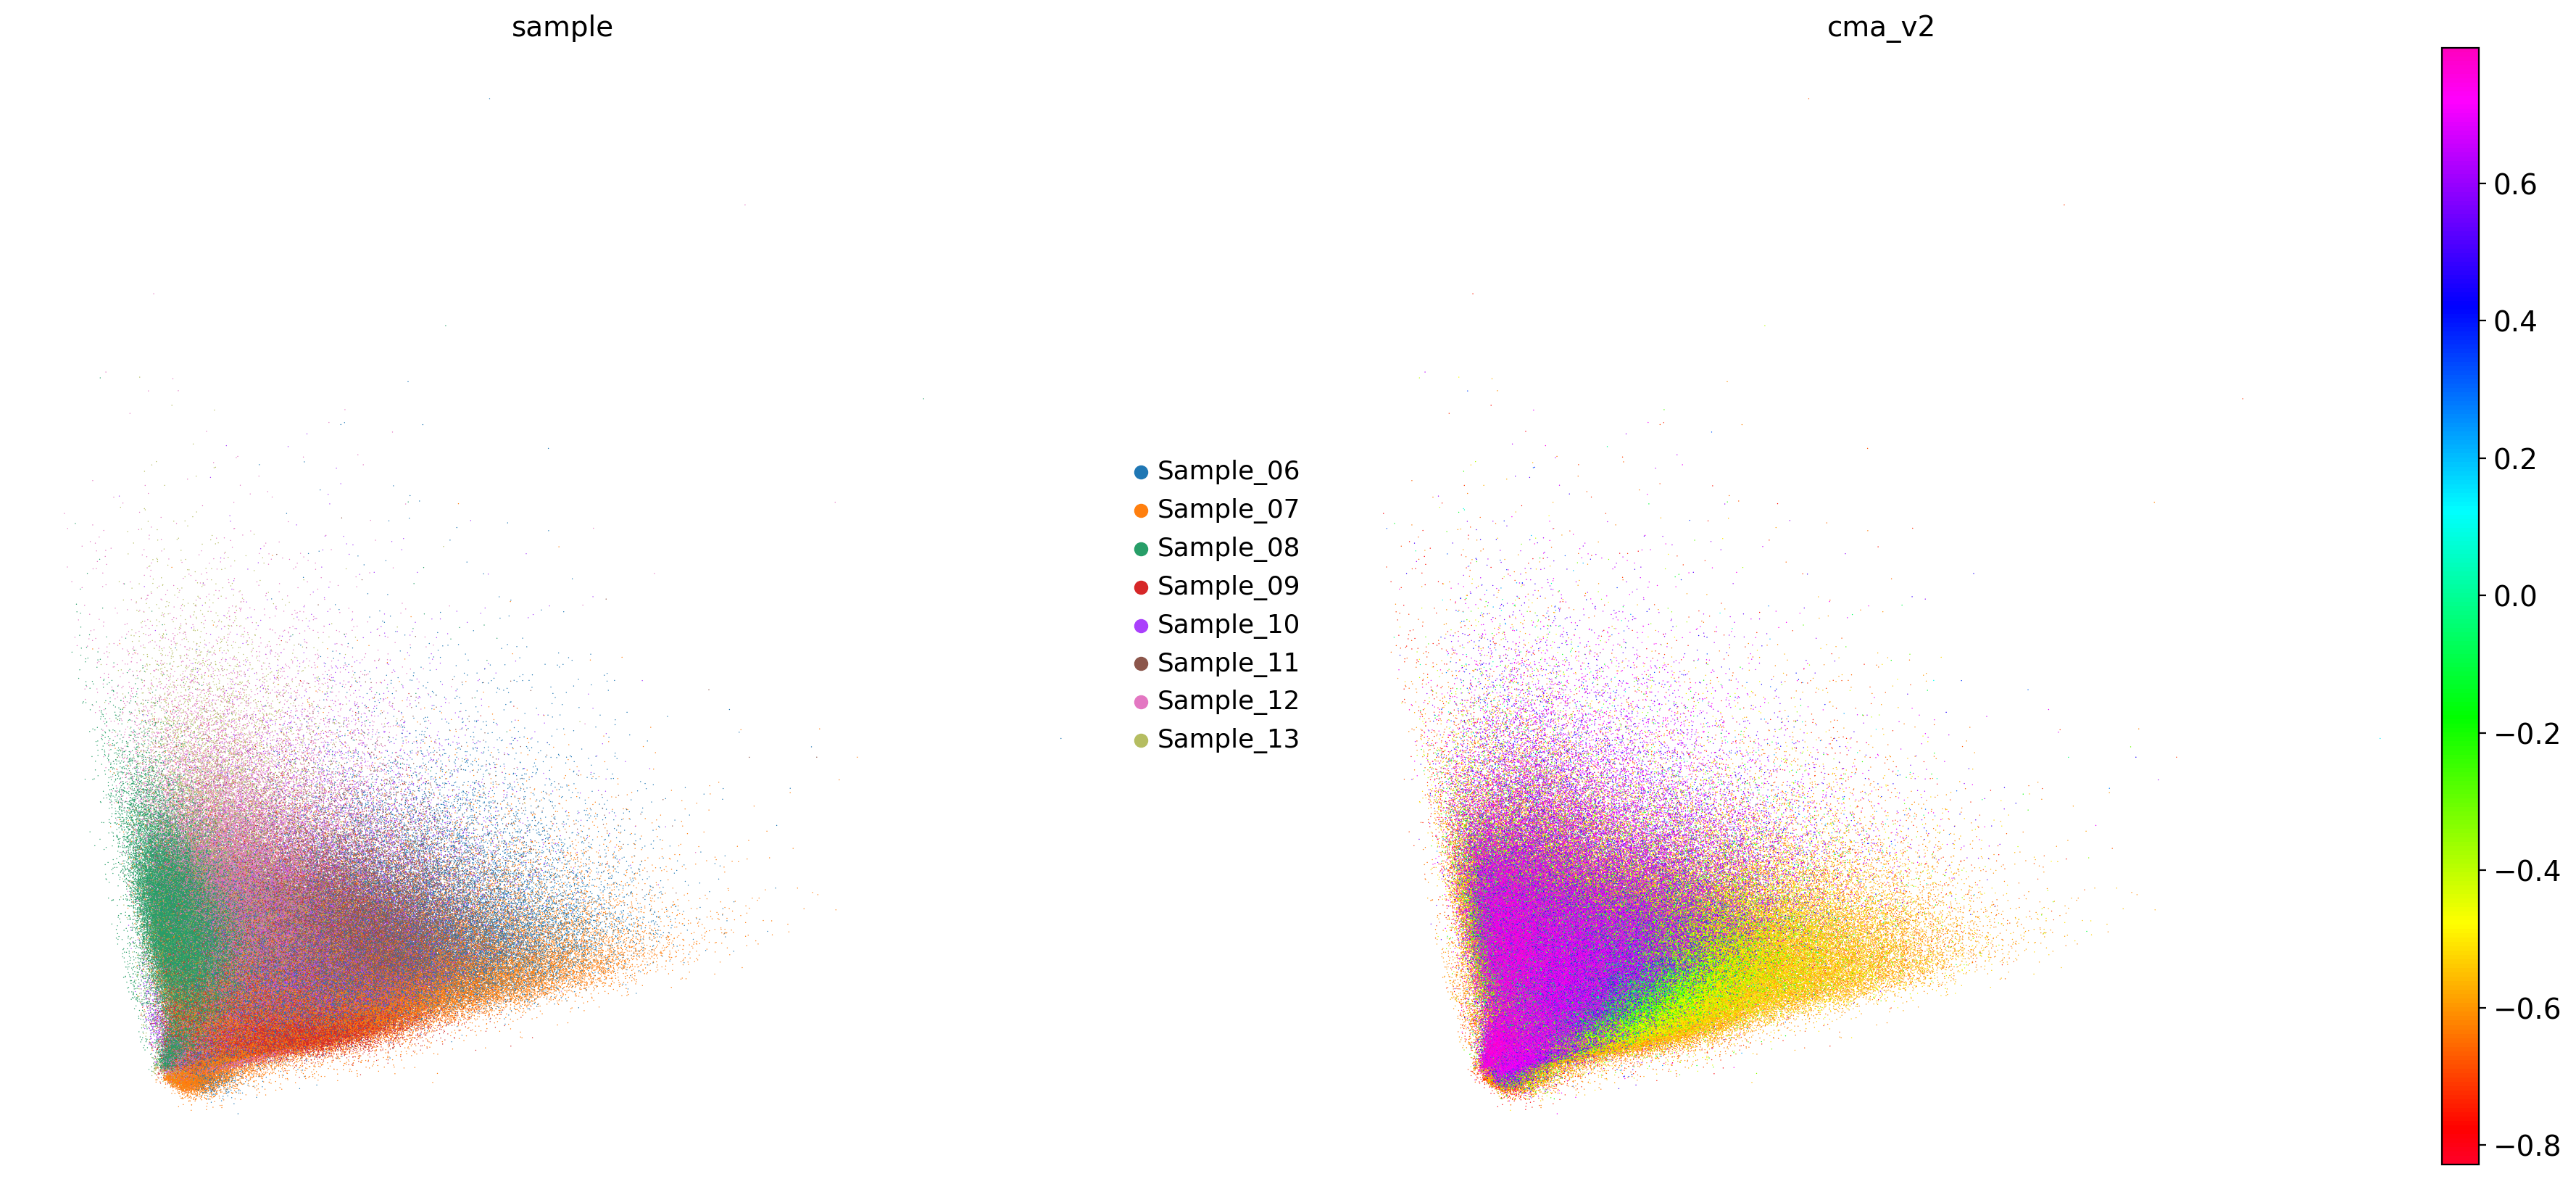

In [15]:
sc.pp.pca(ibex_gene, n_comps = 10)
sc.set_figure_params(figsize=[10,10],dpi=100)
sc.pl.pca(ibex_gene,color=['sample','cma_v2'],cmap='gist_rainbow',frameon=False,s=1)

In [16]:
ibex_gene.var['gene_name'] = ibex_gene.var['gene_name'].astype(str)
ibex_gene.var = ibex_gene.var.set_index("gene_name")
ibex_gene.var

protein_name  n_cells
gene_name                          
CHGA             CHGA_mean   610156
CD99             CD99_mean   659684
CD163           CD163_mean   608137
ITGAX           CD11C_mean   659370
CD8A              CD8_mean   659693
CD3D              CD3_mean   659646
CD5               CD5_mean   659919
MS4A1            CD20_mean   659830
CD34             CD34_mean   570336
CD7               CD7_mean   659949
PECAM1           CD31_mean   645469
ENTPD1           CD39_mean   660168
CD4               CD4_mean   660478
TRAV7           VA7.2_mean   660476
TUBB3           TUBB3_mean   588676
MRC1            CD206_mean   659739
SPARC           SPARC_mean   652320
LMNA          LAMIN_A_mean   551353
HLA-DRB1        HLADR_mean   660637
IL3RA           CD123_mean   632564
LY75           DEC205_mean   660077
AQP1             AQP1_mean   660308
MKI67            KI67_mean   659336
AIRE             AIRE_mean   445819
ITGA1           CD49A_mean   659925
KRT10      KERATIN_10_mean   578528
KRT15      KERATIN_15_mean   659486
LUM           LUMICAN_mean   659689
LYVE1           LYVE1_mean   348134
VIM          VIMENTIN_mean   660165
KRT14      KERATIN_14_mean   659882
ANXA1        ANNEXIN1_mean   643720
FUT4             CD15_mean   588831
PTPRC            CD45_mean   660336
SYP               SYP_mean   657588
TCRG            TCRGD_mean   485482
KRT8        KERATIN_8_mean   660498
ACTA2            ASMA_mean   626570
KRT5        KERATIN_5_mean   660502
FOXP3           FOXP3_mean   381193
DES            DESMIN_mean   572953
ITGA6           CD49F_mean   536181

# save clean objects 

In [17]:
len(set(ibex_gene.var_names).intersection(gex.var_names))

41

In [18]:
# ibex_gene.write_h5ad('ibex_processed.h5ad')
# gex.write_h5ad('gex_processed.h5ad')

# run patcher

In [18]:
# run pisser on individual samples without batch correctino 
import time
import scanpy as sc

# Get unique samples
unique_samples = ibex_gene.obs['sample'].unique()

# Dictionary to hold output for each sample
out_dict = {}

# Run the function for each sample and append the result to the list
for sample in unique_samples:
    start_time = time.time()
    ibex_gene_sample = ibex_gene[ibex_gene.obs['sample'] == sample].copy()
    out_sample = ip.patch(iss=ibex_gene_sample, gex=gex, obs_to_take=[anno1,anno2], computation='cKDTree', neighbours=20)
    out_dict[sample] = out_sample
    end_time = time.time()
    print(f"Processed sample {sample} in {end_time - start_time} seconds")

# Concatenate all the results
out = sc.concat(out_dict, join='outer')

/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_09 in 155.21115589141846 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_08 in 195.63662600517273 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_06 in 164.58261036872864 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_07 in 250.83841228485107 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_10 in 118.37036561965942 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_11 in 154.9261839389801 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_13 in 89.70022130012512 seconds


/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/nfs/team205/ny1/miniconda/miniconda3/envs/imagespot/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


Processed sample Sample_12 in 162.9250271320343 seconds


In [19]:
# run pisser on all (memory migh not make it)
# out = ip.patch(iss=ibex_gene, gex=gex, obs_to_take=anno,computation='cKDTree',neighbours=15)

In [20]:
out

AnnData object with n_obs × n_vars = 660978 × 36710
    obs: 'label', 'y', 'x', 'Unnamed: 0.1', 'Unnamed: 0', 'sample', 'annotation_lv_0', 'annotation_lv_0_number', 'annotation_lv_1', 'annotation_lv_1_number', 'L2_dist_annotation_lv_0_Cortex', 'L2_dist_annotation_lv_0_Edge', 'L2_dist_annotation_lv_0_Medulla', 'L2_dist_annotation_lv_1_HS', 'L2_dist_annotation_lv_1_Other', 'L2_dist_annotation_lv_1_PVS', 'L2_dist_annotation_lv_1_Vessels', 'L2_dist_annotation_lv_1_unassigned', 'cma_v2', 'manual_bin_cma_v2', 'manual_bin_cma_v2_int', 'n_genes', 'annotation_level_3', 'annotation_level_3_fraction', 'anno_CITE_4v5', 'anno_CITE_4v5_fraction'

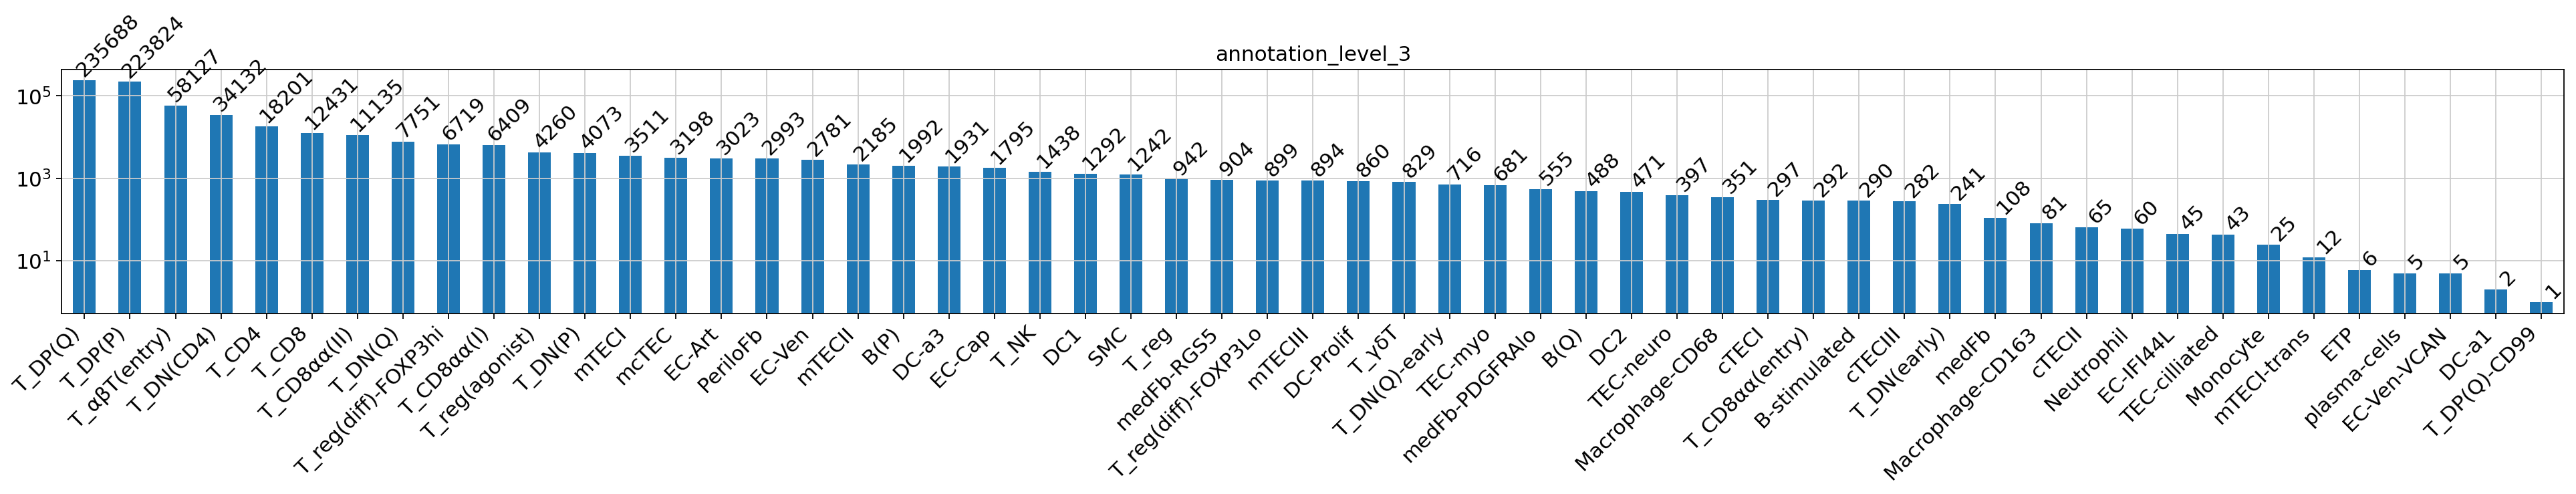

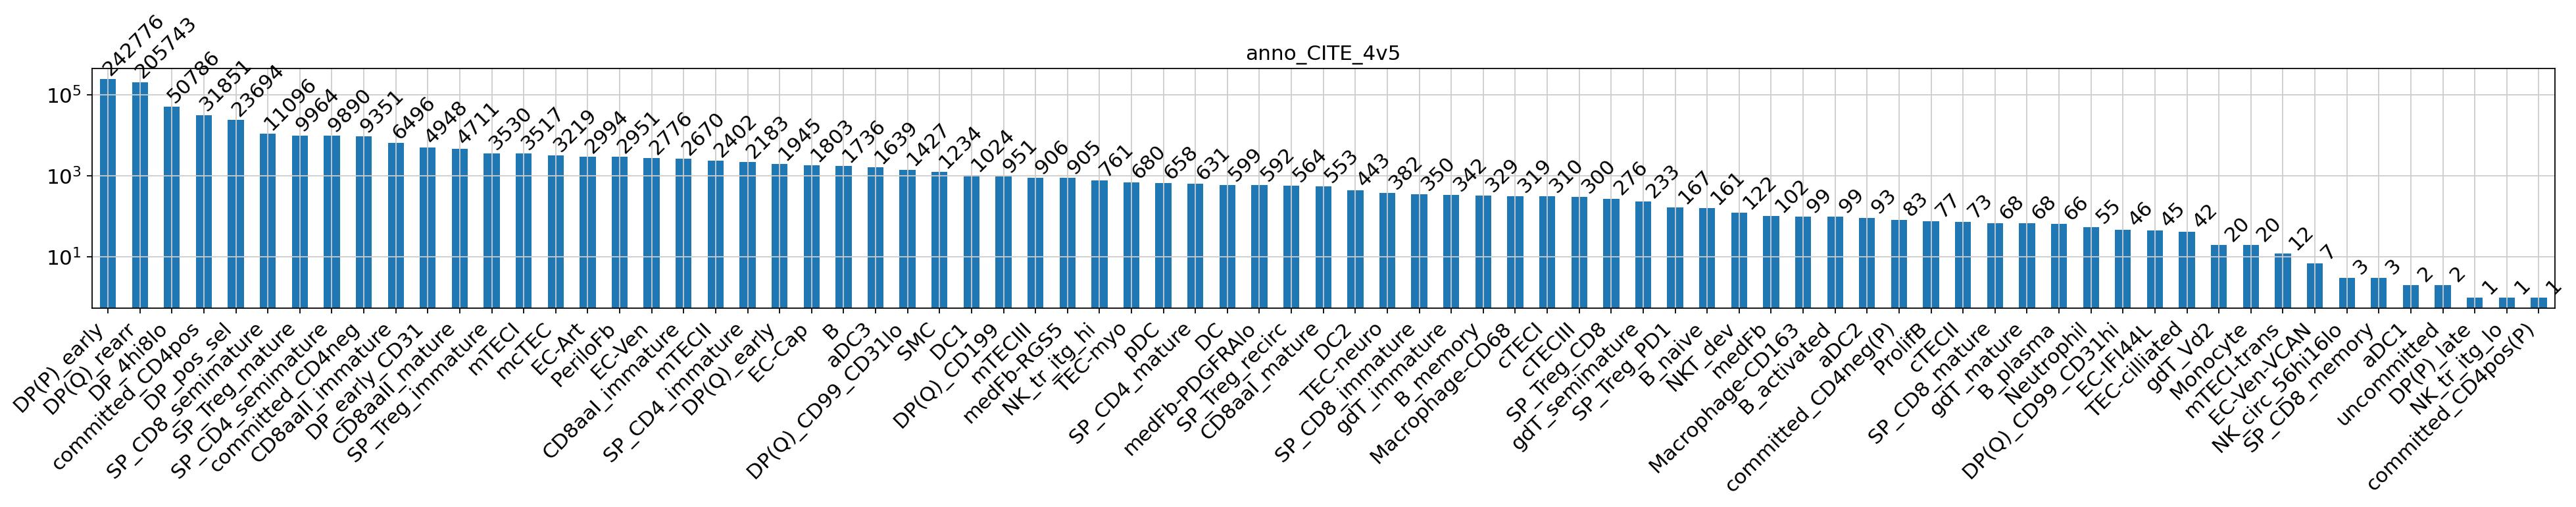

In [21]:
import matplotlib.pyplot as plt
sc.set_figure_params(figsize=[30,3])
# Plot the bar graph
ax = out.obs[anno1].value_counts().plot(kind='bar')
# Add count values on top
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),
                rotation=45, va='bottom', ha='left')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.title(anno1)
plt.show()

# Plot the bar graph
ax = out.obs[anno2].value_counts().plot(kind='bar')
# Add count values on top
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),
                rotation=45, va='bottom', ha='left')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.title(anno2)
plt.show()




# get PCA

In [20]:
sc.pp.pca(out, n_comps = 10)


KeyboardInterrupt



In [ ]:
sc.set_figure_params(figsize=[10,10],dpi=100)

In [ ]:
sc.pl.pca(out,color=['sample'],frameon=False,s=0.5,components=['1,2', '3,4','5,6','7,8'])
sc.pl.pca(out,color=['cma_v2'],cmap='gist_rainbow',frameon=False,s=0.5,components=['1,2', '3,4','5,6','7,8'])

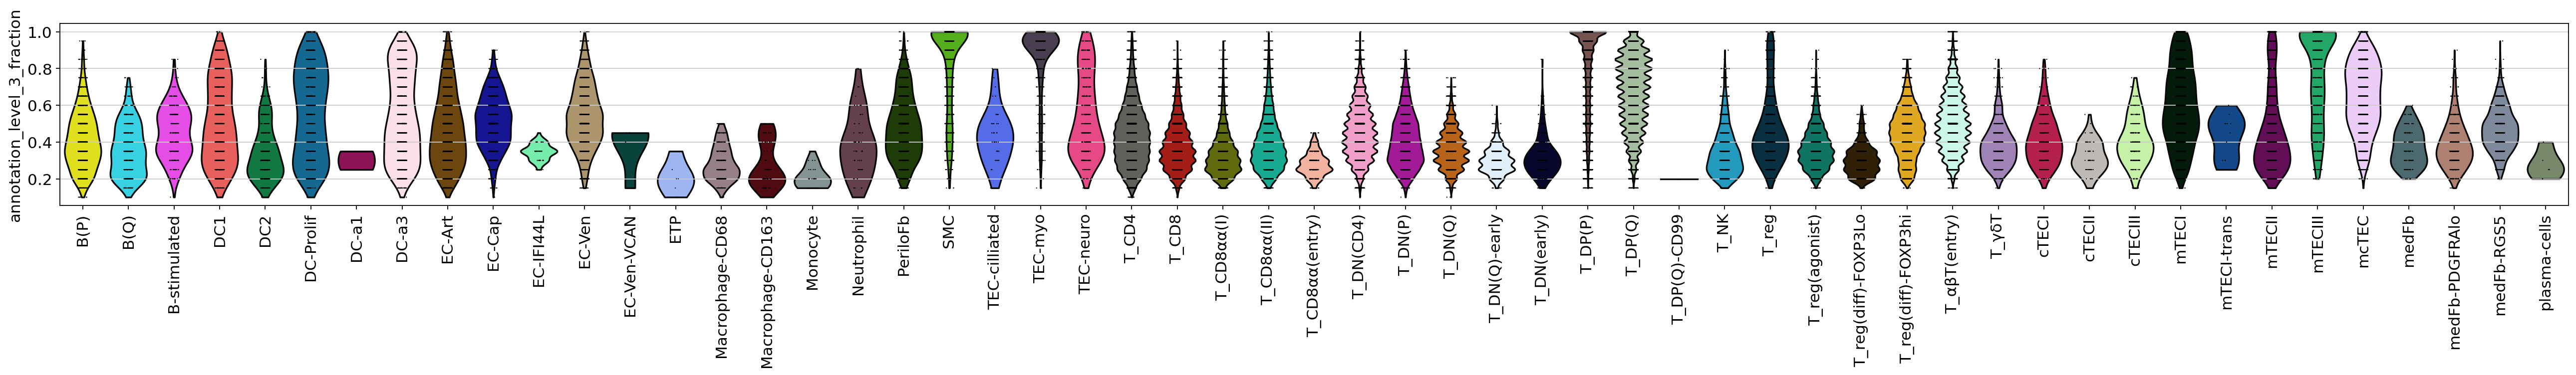

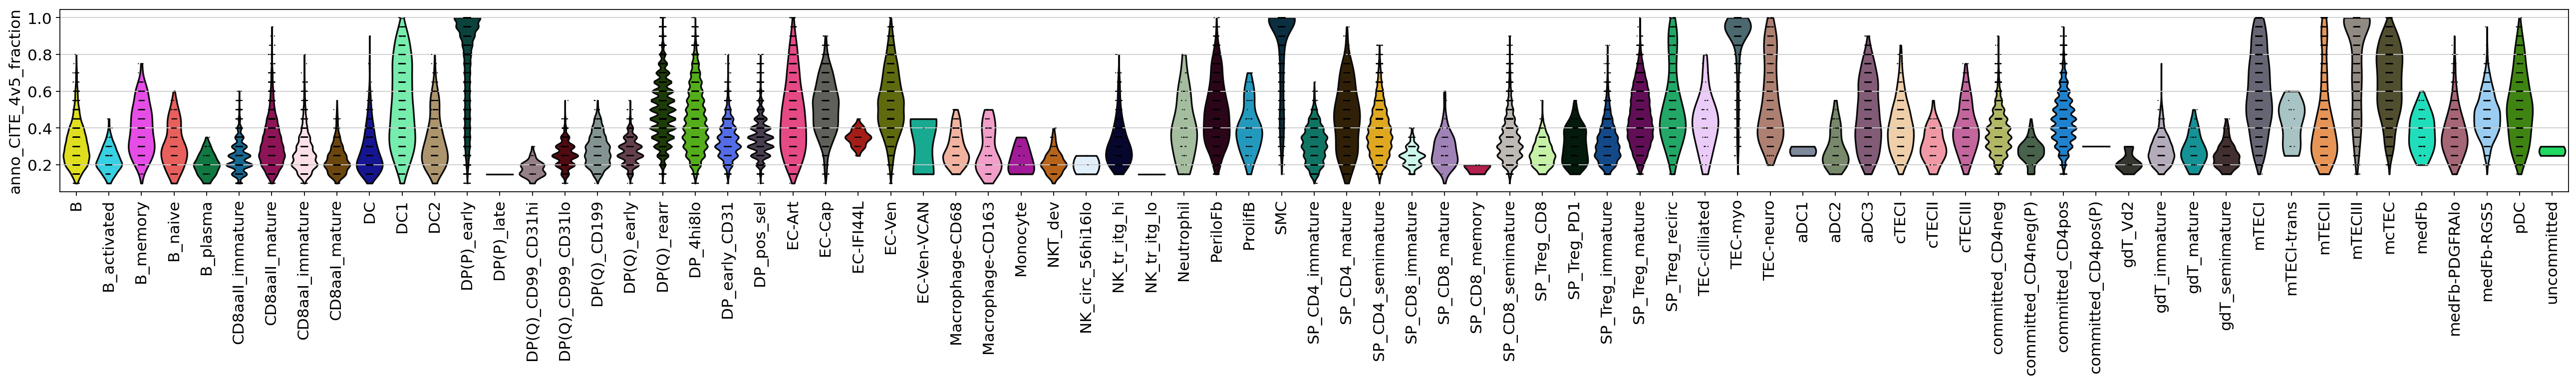

In [22]:
sc.set_figure_params(figsize=[30,3])
sc.pl.violin(out, keys=anno1+'_fraction', groupby=anno1, rotation=90)
sc.set_figure_params(figsize=[30,3])
sc.pl.violin(out, keys=anno2+'_fraction', groupby=anno2, rotation=90)

In [30]:
# remove cells that their centatnty (KNN fraction) is low 
# fraction = 0.5
# out= out[out.obs[anno1+'_fraction']>fraction]
# remove cells that are not captured 
keep = out.obs[anno2].value_counts()[out.obs[anno2].value_counts() > 20].index
out = out[out.obs[anno2].isin(keep)]
# out

In [ ]:
out.write_h5ad('out_raw_600K_knn20.h5ad')